## Exemples

https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
https://github.com/zingale/astro_animations/blob/master/solar_system_motion/parallax/parallax.py

---

https://fiftyexamples.readthedocs.io/en/latest/gravity.html

## **MON** travail (Yakumo KUNIMOTO)

## Comparaison Terre-Mars

---

|                                 | Terre (symbole: ⊕)| Mars  (symbole: ♂)|
| -------------                   |:-------------:    | :---------:        |
| Masse (㎏)                      | $6×10^{24}$       | $6×10^{23}$        |
| demi grand-axe (㎞)             | $1,5×10^8$        | $2,3×10^8$         |
| Exentricité                     | 0,01              | 0,09               |
| vitesse orbitale moyenne (㎞/s) | 30                | 24                 |
| période de révolution (jours)   | 365,25            | 686,96             |
| période synodique (jours)       | -                 | 779,96             |

Masse du Soleil :   $2×10^{30}$ ㎏
    
Période synodique de Mars: c'est le temps mis par Mars pour revenir à la même configuration Terre-Mars-Soleil, c'est-à-dire à la même place dans le ciel par rapport au Soleil, vu de la Terre.

 > [Wiki Terre](https://fr.wikipedia.org/wiki/Terre)       [Wiki Mars](https://fr.wikipedia.org/wiki/Mars_(planète) 

C:\Python34\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


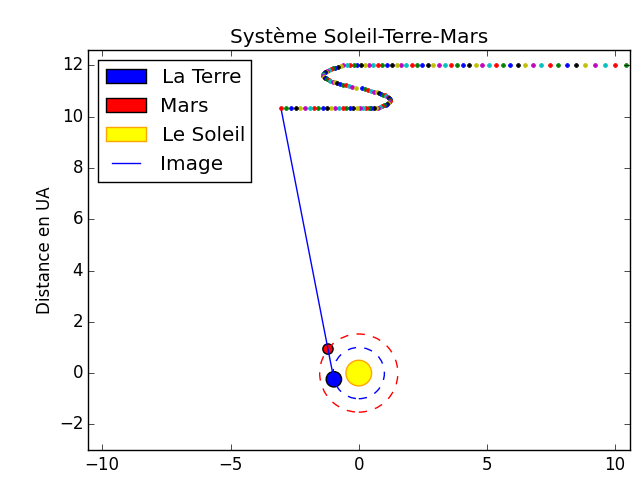

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
vTerre=2
vMars=1
dTerre=1
dMars=1.5236794
d3=10

#Animation
fig1 = plt.figure()
fig1.set_dpi(100)
fig1.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image') 
b=12
T=False

def init1():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Terre.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    return Terre, Mars, line

def animate1(i):
    global b,T
    x, y = Terre.center
    x = 0 - dTerre * np.sin(np.radians(i)*vTerre)
    y = 0 + dTerre * np.cos(np.radians(i)*vTerre)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 - dMars * np.sin(np.radians(i)*vMars)
    w = 0 + dMars * np.cos(np.radians(i)*vMars)
    Mars.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(dTerre*dMars))<=(math.pi)/2 and T==True:
        if (b-dTerre * np.cos(np.radians(i+5)*vTerre)-dTerre * np.sin(np.radians(i+5)*vTerre)*(dMars*np.cos(np.radians(i+5)*vMars)-dTerre * np.cos(np.radians(i+5)*vTerre))/(-dMars * np.sin(np.radians(i+5)*vMars)+dTerre * np.sin(np.radians(i+5)*vTerre)))/((dMars*np.cos(np.radians(i+5)*vMars)-dTerre * np.cos(np.radians(i+5)*vTerre))/(-dMars * np.sin(np.radians(i+5)*vMars)+dTerre * np.sin(np.radians(i+5)*vTerre)))-a>-0.5:
            b=b-0.03
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
        plt.plot(a,b, marker='.')

    elif math.acos((x*v+w*y)/(dTerre*dMars))>(math.pi)/2:
        line.set_data([x,v],[y,w])
        b=12
        T=True
    return Terre, Mars, line

anim1 = animation.FuncAnimation(fig1, animate1, 
                               init_func=init1, 
                               frames=360, 
                               interval=10,
                               blit=True)


#Cercles
OTerre=plt.Circle((0, 0), dTerre, fc='none', color='b', label='OTerre', linestyle='dashed')
OMars=plt.Circle((0, 0), dMars, fc='none', color='r', label='OMars', linestyle='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='yellow', color='orange', label='Le Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)



#Finitions
pylab.title('Système Soleil-Terre-Mars')
plt.legend(loc='upper left', handles=[Terre, Mars , Soleil, line])
plt.xlabel('Distance en UA')
plt.ylabel('Distance en UA')
plt.axis('equal')
ylim(-3,12.6)
xlim(-11,11)
plt.show()



C:\Python34\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: invalid value encountered in double_scalars
C:\Python34\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


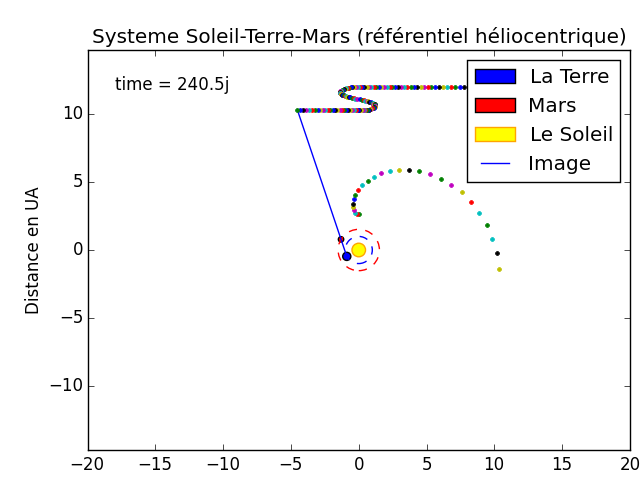

In [2]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=3
v2=3*365.25/686.96
d1=1
d2=1.5236794
d3=5

#Animation
fig2 = plt.figure()
fig2.set_dpi(100)
fig2.set_size_inches(7,5)

ax = plt.axes(xlim=(-7, 7), ylim=(-7, 7))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image') 
dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
k=0

def init2():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    time_text.set_text('')
    return Terre, Mars, line,time_text

def animate2(i):
    global k
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (v, w)
    a=d3*(v-x)
    b=d3*(w-y)
    if i%3==0:
        plt.plot(a,b, marker='.')
    line.set_data([x,a],[y,b])
    k=k+1
    if math.floor(1000*math.sqrt((x-v)**2+(y-w)**2))==800:
        k=1
    time_text.set_text(time_template % (k*dt))
    return Terre, Mars, line, time_text





anim2 = animation.FuncAnimation(fig2, animate2, 
                               init_func=init2, 
                               frames=36000000, 
                               interval=100,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed')
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='yellow', color='orange', label='Le Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Systeme Soleil-Terre-Mars (référentiel héliocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars, Soleil, line])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
axis('equal')
xlim(-20,20)
ylim(-15,15)
plt.show()

C:\Python34\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: invalid value encountered in double_scalars
C:\Python34\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


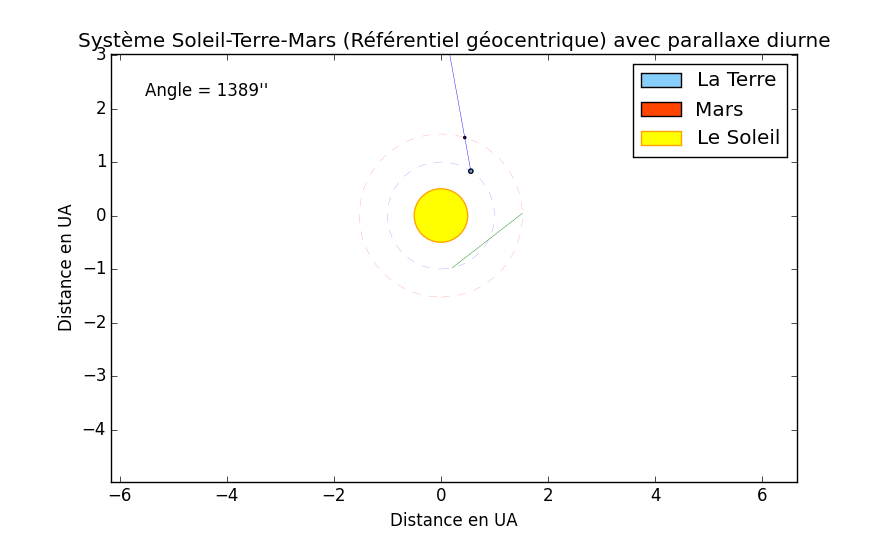

In [3]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=1
v2=365.25/686.96
d1=1
d2=1.5236794

#Animation
fig3 = plt.figure()
fig3.set_dpi(100)
fig3.set_size_inches(11, 11)

ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))

Terre = plt.Circle((5, -5), 0.04, fc='lightskyblue', label='La Terre')
Mars = plt.Circle((5, -5), 0.02, fc='orangered',label='Mars')
line, = plot([],[], label='Image',c='black',linewidth=0.3)
line2, = plot([],[], label='Image',c='black' , linewidth=0.3) 

angle_template = "Angle = %.0f''"
angle_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init3():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    line2.set_data([],[])
    angle_text.set_text('')
    return Terre, Mars, line, line2, angle_text

def animate3(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i/3)*v1)
    y = 0 + d1 * np.cos(np.radians(i/3)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i/3)*v2)
    w = 0 + d2 * np.cos(np.radians(i/3)*v2)
    Mars.center = (v, w)
    a = 0 + d1 * np.sin(np.radians(i/3+1.5)*v1)
    b = 0 + d1 * np.cos(np.radians(i/3+1.5)*v1)
    ax.set_xlim(-4+x,4+x)
    ax.set_ylim(-4+y,4+y)
    line.set_data([x,v],[y,w])
    line2.set_data([a,v],[b,w])
    if (x-v)**2+(y-w)**2<2.27936637**2-1.495978875**2:
        angle_text.set_text(angle_template % (3600*np.degrees(math.acos(((x-v)*(a-v)+(y-w)*(b-w))/(math.sqrt((x-v)**2+(y-w)**2)*math.sqrt((a-v)**2+(b-w)**2))))))
    else:
        angle_text.set_text(angle_template % (-3600*np.degrees(math.acos(((x-v)*(a-v)+(y-w)*(b-w))/(math.sqrt((x-v)**2+(y-w)**2)*math.sqrt((a-v)**2+(b-w)**2))))))
    return Terre, Mars, line, line2, angle_text

anim3 = animation.FuncAnimation(fig3, animate3, 
                               init_func=init3, 
                               frames=36000000, 
                               interval=5,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed',linewidth=0.1)
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed',linewidth=0.1)
Soleil=plt.Circle((0, 0), 0.5, fc='yellow', color='orange',label='Le Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Système Soleil-Terre-Mars (Référentiel géocentrique) avec parallaxe diurne')
plt.legend(loc='upper right', handles=[Terre, Mars, Soleil])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
axis('equal')
plt.show()

C:\Python34\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: invalid value encountered in double_scalars
C:\Python34\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


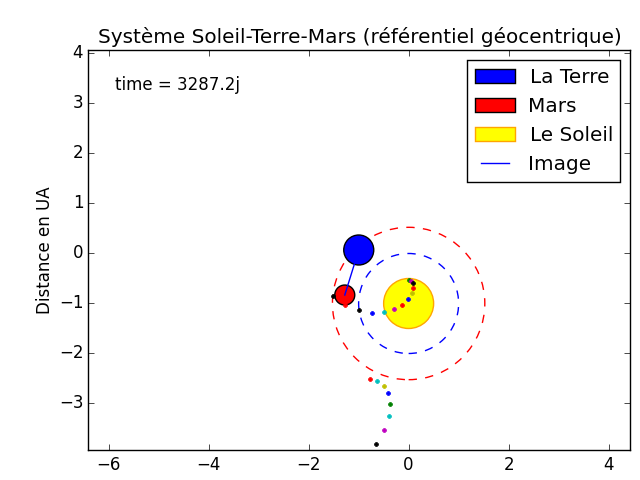

In [4]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=3
v2=3*365.25/686.96
d1=1
d2=1.5236794

#Animation
fig4 = plt.figure()
fig4.set_dpi(100)
fig4.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((0, 0), 0.3, fc='b', label='La Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
Soleil=plt.Circle((5, -5), 0.5, fc='yellow', color='orange', label='Le Soleil')
OTerre=plt.Circle((0, 0), radius=d1, fc='none', color="blue", ls='dashed')
OMars=plt.Circle((0, 0), radius=d2, fc='none', color="r", ls='dashed')
line, = plot([],[], label='Image',c='black')

dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init4():
    OTerre.center = (5, 5)
    ax.add_patch(OTerre)
    Soleil.center = (5, 5)
    ax.add_patch(Soleil)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    OMars.center = (5, 5)
    ax.add_patch(OMars)
    Terre.center= (0,0)
    ax.add_patch(Terre)
    time_text.set_text('')
    return Mars, Soleil, OTerre, OMars, line, time_text

def animate4(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    OTerre.center = (x, y)
    Soleil.center = (x, y)
    OMars.center = (x,y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (x-v, y-w)
    line.set_data([0,x-v],[0,y-w])
    if i%5==0:
        plt.plot(x-v,y-w, marker='.')
    time_text.set_text(time_template % (i*dt))
    return Mars, Soleil, OTerre, OMars, line, time_text

anim4 = animation.FuncAnimation(fig4, animate4, 
                               init_func=init4, 
                               frames=3600, 
                               interval=100,
                               blit=True)

#Finitions
pylab.title('Système Soleil-Terre-Mars (référentiel géocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars, Soleil, line])
pylab.xlabel('Distance en UA')
pylab.ylabel('Distance en UA')
axis('equal')
xlim(-5,5)
ylim(-5,5)
plt.show()